<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;">    <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2024/2025</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Project</center></b></h2>
    <h4><i><b><center>Predicting Cervical Cancer: A Machine Learning Approach Using Risk Factor Analysis 
</center></b></i></h4></td></tr>
</table>


 <h3>Requesitos nos  modelos </h3>
 <li> Comparison of at least 3 models</li>
 <li>Cross-Validation</li>
 <li> Grid Search </li>
 <li> Results evaluation and discussion </li>


<h3>Avaliação </h3>

 <li> Quality of coding (temos de tipo comentar e explicar tudo)</li>
 <li>Creativity</li>
 <li> Comparison with the state of the Art </li>



<h3>1. Introduction</h3>

Cervical cancer is the fourth most common cancer worldwide and a significant cause of mortality, particularly in low- and middle-income countries, where 94% of all deaths occur [1]. Although medicine has evolved, implementing cytology-based and other types of screening remains challenging in these countries due to the lack of healthcare infrastructure and trained professionals [2]. 
With that in mind, machine learning can be used as a helpful system for interpreting complex datasets and support clinical decision-making due to its strong data analysis capabilities [3].

In clinical cases, the most common ways to detect this type of cancer include **the Cytology method, the biopsy, the Hinselmann test, and the Schiller test**. **The Cytology method** involves a microscopic analysis of tissue collected from the cervix to identify cell growth and its intensity. **The biopsy** is a surgical diagnostic procedure that involves collecting living tissue samples to determine if the sample is malignant or benign. **The Hinselmann test** is a visual inspection of the cervix using an iodine solution. However, the results of this test can vary depending on the examiner's expertise. **The Schiller test**, on the other hand, involves administering Lugol’s iodine for visual inspection of suspicious areas on the cervix. To reduce the high mortality rate of cervical cancer, it is crucial for women over 30 years of age to undergo regular screening tests every 3–5 years. In underdeveloped countries, however, frequent screening has been challenging due to limited medical infrastructure and expertise. Thus, we saw an opportunity for a biomedical solution that could renovate this practice and make it more accesible.


Altough the initial approach was to use machine learning characteristics' combined with the risk factors, in order to predict the presence of the cancer, upon analyzing the data and being more familiarized with the problem itself , it occured to us we could rewire the project to predict the results of the main four tests used to detect cervical cancer (Hinselmann, Schille, Citology and Biopsy). This work could be relevant for the management of clinical resources. For example, a person exhibiting certain risk factors could be called in to undergo only two of the four exams, saving both financial and material resource. 

Nevertheless, in order to fulfill the initial approach, we decided to use a model to predict 

 <h3>2. Data Preparation </h3>

The data preparation phase is a critical step in the development of any machine learning model. This phase involves transforming raw data into a clean, organized, and usable format, ensuring it is suitable for analysis and modeling. The primary goal of data preparation is to address inconsistencies, fill in missing values, and convert data into a format that aligns with the requirements of machine learning algorithms.

<h4> 2.1 Data import </h4>

In [447]:
#!pip install ucimlrepo
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
from typing import Tuple
from sklearn.model_selection import train_test_split
import statistics

In [449]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
df_cervical_cancer = cervical_cancer_risk_factors.data.features 

#Getting dataset dimensions
n_rows = df_cervical_cancer.shape[0]
n_features = df_cervical_cancer.shape[1]
print('The dataset has {} samples and {} features. \n'.format(n_rows, n_features))

#Showing the first 10 rows of the dataset
print('The first 10 rows are displayed below. \n\n')
df_cervical_cancer.head(10)


The dataset has 858 samples and 36 features. 

The first 10 rows are displayed below. 




,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


<h5> 2.1.1 Data types </h5>
<p style="font-size:15px;"> The data is divided in integer values such as age and number of diagnosis, floats, like the age at which the patient had its first sexual intercourse and a binary classification (0 as false and 1 as true) to evaluate the results of the tests, presence of STD's etc. </p>

In [451]:
print(df_cervical_cancer.dtypes)

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [452]:
#Get all the columns with a binary classification 
binary_columns = df_cervical_cancer.loc[:, (df_cervical_cancer.isin([0, 1]) | df_cervical_cancer.isna()).all()]
binary_columns.describe().iloc[[0]]

,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,845.0,750.0,741.0,753.0,753.0,753.0,753.0,753.0,753.0,753.0,...,753.0,753.0,858.0,858.0,858.0,858.0,858.0,858.0,858.0,858.0


In [453]:
#Get the columns with continuos values
continuous_columns = df_cervical_cancer.drop(binary_columns.columns, axis=1)
continuous_columns.describe().iloc[[1,2,3,7]]


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
mean,26.820513,2.527644,16.995300,2.275561,1.219721,0.453144,2.256419,0.514804,0.176627,0.087413,6.140845,5.816901
std,8.497948,1.667760,2.803355,1.447414,4.089017,2.226610,3.764254,1.943089,0.561993,0.302545,5.895024,5.755271
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,22.000000,22.000000


In [454]:
df_cervical_cancer.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

<p style="font-size:15px;"> As colunas  'STDs: Time since first diagnosis' e 'STDs: Time since last diagnosis' have a lot of missing values  então vamos droppar (n me apetece escrever em ingles)</p>

In [456]:
df_cervical_cancer= df_cervical_cancer.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1)


In [457]:
zero_per_columns = (df_cervical_cancer == 0).sum()
print(zero_per_columns)

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                     16
Smokes                                722
Smokes (years)                        722
Smokes (packs/year)                   722
Hormonal Contraceptives               269
Hormonal Contraceptives (years)       269
IUD                                   658
IUD (years)                           658
STDs                                  674
STDs (number)                         674
STDs:condylomatosis                   709
STDs:cervical condylomatosis          753
STDs:vaginal condylomatosis           749
STDs:vulvo-perineal condylomatosis    710
STDs:syphilis                         735
STDs:pelvic inflammatory disease      752
STDs:genital herpes                   752
STDs:molluscum contagiosum            752
STDs:AIDS                             753
STDs:HIV                              735
STDs:Hepatitis B                  

<p style="font-size:15px;">STDs:AIDS e STDs:cervical condylomatosis  têm todos os valores = 0 pelo q vamos dropar  </p>

In [520]:
df_cervical_cancer= df_cervical_cancer.drop(['STDs:AIDS','STDs:cervical condylomatosis'], axis=1)

KeyError: "['STDs:AIDS', 'STDs:cervical condylomatosis'] not found in axis"

In [460]:
df_cervical_cancer.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis         

<p style="font-size:15px;"> Como podemos observar, existem diversas variáveis com missing values pelo que em colunas com valores demograficos, tal como 'Number of sexual partners', 'Number of pregrancies' e 'Hormonal contraceptives', estes serão substituidos pela média da coluna  </p> (artigo)


In [462]:
list_nonbinary = ['Number of sexual partners', 'First sexual intercourse' ,'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)','IUD (years)'] 
list_binary = ['Smokes','Hormonal Contraceptives', 'IUD']

for col in list_nonbinary:
    mean = df_cervical_cancer[col].mean()
    df_cervical_cancer[col] = df_cervical_cancer[col].fillna(mean)
    
for col in list_binary:
    mean = df_cervical_cancer[col].mean()
    df_cervical_cancer[col] = df_cervical_cancer[col].fillna(round(mean))
    
df_cervical_cancer.isnull().sum()


Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis         

<p style="font-size:15px;"> Agora vamos tirar os outros que têm NaN  </p> 


In [464]:
df_cervical_cancer.dropna(inplace = True)
print(df_cervical_cancer.shape[0])

753


<p style="font-size:15px;"> Agora vamos verificar se os dados das target variables são desbalanceados  </p> 

The proportion of positive for each target variable, in percentage, is: 

Hinselmann     4.874652
Schiller      10.735294
Citology       5.758427
Biopsy         7.571429
dtype: float64


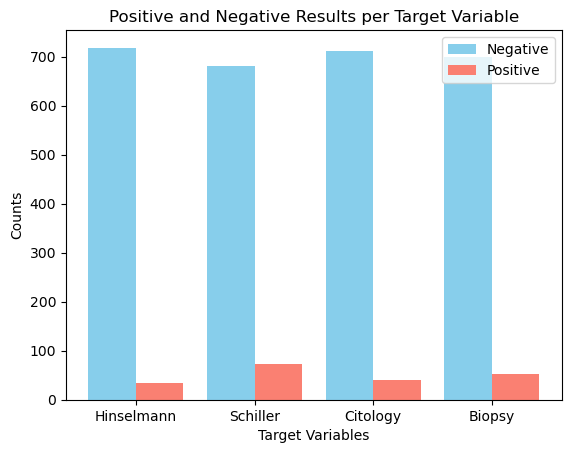

In [466]:
targets = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
target_variables = df_cervical_cancer[targets]

negative_per_target = (target_variables == 0).sum()

positive_per_target = (target_variables == 1).sum()

proportion = (positive_per_target/negative_per_target)*100

print('The proportion of positive for each target variable, in percentage, is: \n\n{}'.format(proportion))

# Plotting
x = np.arange(len(targets))  # Positions for the bars
width = 0.4  # Width of each bar

plt.bar(x - width/2, negative_per_target, width, label='Negative', color='skyblue')
plt.bar(x + width/2, positive_per_target, width, label='Positive', color='salmon')

# Adding labels and title
plt.xlabel('Target Variables')
plt.ylabel('Counts')
plt.title('Positive and Negative Results per Target Variable')
plt.xticks(x, targets)
plt.legend()


<p style="font-size:15px;">São bué, vamos criar dados para balancear usando o smote </p> 

In [470]:
#Correlação entre as target variables
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = df_cervical_cancer.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'],axis=1).corr()

threshold = 0.7
df_corr_filtered = df_corr[df_corr > threshold]

pairs = []
for i in range(len(df_corr_filtered.columns)):
    for j in range(i):
        if df_corr_filtered.iloc[i, j] > threshold and i!=j:
            pairs.append((df_corr_filtered.columns[i], df_corr_filtered.columns[j], df_corr_filtered.iloc[i, j]))

# Show the pairs and their correlation values
for pair in pairs:
    print(f"Features: {pair[0]} and {pair[1]} have a correlation of {pair[2]:.2f}")


Features: Smokes (years) and Smokes have a correlation of 0.72
Features: Smokes (packs/year) and Smokes (years) have a correlation of 0.72
Features: IUD (years) and IUD have a correlation of 0.75
Features: STDs (number) and STDs have a correlation of 0.92
Features: STDs:condylomatosis and STDs have a correlation of 0.73
Features: STDs:condylomatosis and STDs (number) have a correlation of 0.90
Features: STDs:vulvo-perineal condylomatosis and STDs have a correlation of 0.72
Features: STDs:vulvo-perineal condylomatosis and STDs (number) have a correlation of 0.89
Features: STDs:vulvo-perineal condylomatosis and STDs:condylomatosis have a correlation of 0.99
Features: STDs: Number of diagnosis and STDs have a correlation of 0.91
Features: STDs: Number of diagnosis and STDs (number) have a correlation of 0.90
Features: Dx:HPV and Dx:Cancer have a correlation of 0.89


In [526]:
from sklearn.preprocessing import MinMaxScaler

Y = df_cervical_cancer[targets]
X = df_cervical_cancer.drop(targets,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

min_max_scaler = MinMaxScaler(feature_range=(0, 1))

# fit the scaler to train set and scale the train data (this will return a numpy.array)
X_train_minmax = min_max_scaler.fit_transform(X_train)

# scale the test data using the scaler that was fitted on the training data
X_test_minmax = min_max_scaler.transform(X_test)

# converting the training and test data back to a pandas.DataFrame (using the column names of the X DataFrame)
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X.columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=X.columns)




 <h3>3. Model Training </h3>

In [488]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from tqdm import tqdm 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, f1_score


<p style="font-size:15px;">FUNÇÃO BLABLABLA EXPLICA </p>

In [491]:
def calculate_metrics_classification(model_name, model_instance, X_train, y_train, X_test, y_test):
    """
    Calculate evaluation metrics for a trained model.

    :param model_name: Name of the model (e.g., "Random Forest").
    :param model_instance: The trained model instance.
    :param X_train: Training features as a numpy array.
    :param y_train: Training labels for a single target variable.
    :param X_test: Test features as a numpy array.
    :param y_test: Test labels for a single target variable.
    :return: A dictionary containing evaluation metrics and predictions.
    """
    train_acc = model_instance.score(X_train, y_train)
    test_acc = model_instance.score(X_test, y_test)

    y_test_pred = model_instance.predict(X_test)
    y_train_pred = model_instance.predict(X_train)

    if model_name == 'SVC':
        y_scores = model_instance.decision_function(X_test)
    else:
        y_scores = model_instance.predict_proba(X_test)[:, 1]
    f1_scorer = make_scorer(f1_score)

    f1_cv = cross_val_score(estimator=model_instance, X=X_train, y=y_train, cv=10, scoring = f1_scorer)

    metrics = {
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "CV F1 mean": np.mean(f1_cv),
        "CV F1 std": np.std(f1_cv),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "Specificity": recall_score(y_test, y_test_pred, pos_label=0),
        "F1 Score": f1_score(y_test, y_test_pred),
        "Area under ROC curve": roc_auc_score(y_test, y_scores),
    }

    # Plot ROC curve
    RocCurveDisplay.from_predictions(y_test, y_scores)

    return metrics

<p style="font-size:15px;">EXPLICA BLABLA  </p>

In [494]:

def train_and_evaluate_multi_target( model: Tuple[str, any], X_train: np.ndarray, Y_train: np.ndarray, X_test: np.ndarray, Y_test: np.ndarray) -> dict[str, list]:
    """
    Train and evaluate a machine learning model for multiple target variables.

    This function trains and evaluates the model for each target variable in Y_train
    and Y_test using cross-validation.

    :param model: A tuple containing the model name as a string and the model instance.
    :param X_train: Training features as a numpy array.
    :param Y_train: Training labels as a numpy array (can have multiple columns).
    :param X_test: Test features as a numpy array.
    :param Y_test: Test labels as a numpy array (can have multiple columns).
    :return: A dictionary containing performance metrics for each target variable.
    """
    model_name, model_instance = model
    metrics_list = []

    # Iterate over each target variable (column in Y_train and Y_test)
    for i in  tqdm(range(Y_train.shape[1])):
        y_train = Y_train.iloc[:, i]  # Seleciona a coluna i do DataFrame
        y_test = Y_test.iloc[:, i]    # Seleciona a coluna i do DataFrame
        target_name = Y_train.columns[i]
        
        # Train the model
        model_instance.fit(X_train, y_train)
        metrics = calculate_metrics_classification(model_name, model_instance, X_train, y_train, X_test, y_test)
        metrics["Target"] = target_name  # Add target-specific information
        metrics_list.append(metrics)

    metrics = pd.DataFrame(metrics_list)
    metrics = metrics.set_index("Target")
    
    return metrics

<p style="font-size:15px;"> EXPLICA </p>

In [497]:
def Grid_search(model: Tuple[str, any], param_grid: dict, X_train: np.ndarray, Y_train: np.ndarray, X_test: np.ndarray, Y_test: np.ndarray) -> tuple:
    """
    Perform hyperparameter tuning using GridSearchCV and evaluate a machine learning model for multiple target variables.

    This function uses GridSearchCV to find the best hyperparameters for a given model, 
    then trains and evaluates the model for each target variable in Y_train and Y_test using cross-validation.

    :param model: A tuple containing the model name as a string and the model instance.
                  Example: ('Linear Regression', LinearRegression())
                  The model instance should be an object from scikit-learn or a similar library.
    :param param_grid: A dictionary with parameter names as keys and lists of parameter settings to try as values.
                       Example: {'alpha': [0.1, 1, 10], 'fit_intercept': [True, False]} 
                       Each key is a hyperparameter name, and each value is a list of possible values for that hyperparameter.
    :param X_train: Training features as a numpy array (n_samples, n_features).
    :param Y_train: Training labels as a numpy array (n_samples, n_targets). It can have multiple columns for multiple target variables.
    :param X_test: Test features as a numpy array (n_samples, n_features).
    :param Y_test: Test labels as a numpy array (n_samples, n_targets). It can have multiple columns for multiple target variables.
    :return: A tuple containing two elements:
             - A DataFrame with performance metrics for each target variable.
             - A list of dictionaries with the best models and their corresponding targets and parameters.
    """
    model_name, model_instance = model
    metrics_list = []
    best_models_list = []
    
     # Iterate over each target variable (column in Y_train and Y_test)
    for i in  tqdm(range(Y_train.shape[1])):
        y_train = Y_train.iloc[:, i]  # Seleciona a coluna i do DataFrame
        y_test = Y_test.iloc[:, i]    # Seleciona a coluna i do DataFrame
        target_name = Y_train.columns[i]
    # Ajustar hiperparâmetros para cada targ
        best_models = {}
    # Configurar o GridSearchCV
        
        grid_search = GridSearchCV(
            estimator=model_instance,
            param_grid=param_grid,
            scoring='f1',
            cv=5,
            n_jobs=-1)
    
    # Treinar o GridSearchCV
        grid_search.fit(X_train, y_train)
    
    # Melhor modelo para o target atual
        best_model = grid_search.best_estimator_
        best_models_list.append({"Target": target_name, "Model": best_model})

       
        metrics = calculate_metrics_classification(model_name, best_model, X_train, y_train, X_test, y_test)
        metrics["Target"] = target_name 
        metrics ["Best Parameters"] = grid_search.best_params_
        metrics_list.append(metrics)
        
    metrics = pd.DataFrame(metrics_list)
    metrics = metrics.set_index("Target")
        
    return metrics, best_models_list


<p style="font-size:15px;"> explica </p>

In [500]:
def Confusion_matrix(models_list, X_test, Y_test):
    """
    Generate and visualize confusion matrices for multiple target variables.

    :param models_list: List of dictionaries containing the target name and model for that target.
    :param X_test: Test features as a numpy array.
    :param Y_test: Test labels as a pandas DataFrame (with multiple columns for multi-target problems).
    """
    num_targets = len(best_models_list)
    rows = (num_targets + 1) // 2  # Number of rows in the subplot grid

    fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, model_info in enumerate(best_models_list):
        target_name = model_info["Target"]
        best_model = model_info["Model"]

        # Get true and predicted labels for the current target
        y_true = Y_test[target_name]
        y_pred = best_model.predict(X_test)

        # Generate confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

        # Plot confusion matrix
        disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
        axes[i].set_title(f'Matriz de Confusão para {target_name}')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout for better visualization
    plt.show()

<p style="font-size:15px;"> EXPLICA </p>

<h4>3.1 Random Forest </h4>

 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:03<00:01,  1.15s/it]C:\Users\larad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.15s/it]


,Train Accuracy,Test Accuracy,CV F1 mean,CV F1 std,Precision,Recall,Specificity,F1 Score,Area under ROC curve
Target,,,,,,,,,
Hinselmann,0.998339,0.947020,0.000000,0.000000,0.0,0.000000,0.993056,0.000,0.644841
Schiller,0.998339,0.907285,0.057143,0.114286,0.5,0.071429,0.992701,0.125,0.616267
Citology,0.998339,0.933775,0.090000,0.181384,0.0,0.000000,0.986014,0.000,0.408217
Biopsy,1.000000,0.920530,0.080000,0.160000,0.0,0.000000,1.000000,0.000,0.694245


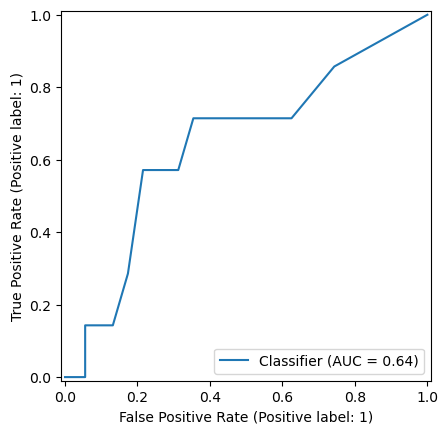

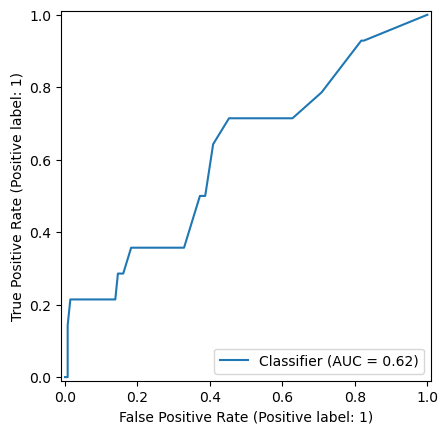

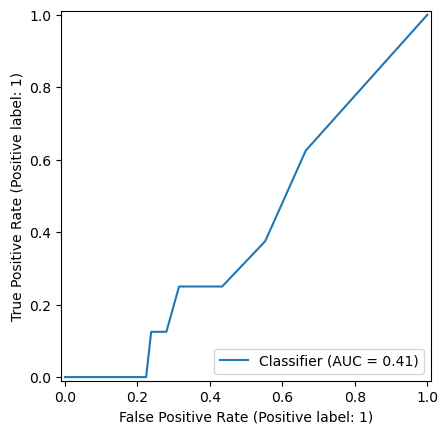

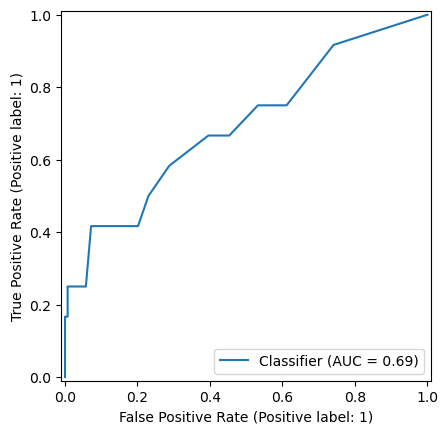

In [524]:
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

random_forest = ('Random Forest', RandomForestClassifier(random_state=42, class_weight='balanced'))

# Treinar e avaliar
model_metrics = train_and_evaluate_multi_target(random_forest, X_train, y_train, X_test, y_test)

# Mostrar o DataFrame com formatação tabular
model_metrics.head()


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:23<00:00,  5.87s/it]


,Train Accuracy,Test Accuracy,CV F1 mean,CV F1 std,Precision,Recall,Specificity,F1 Score,Area under ROC curve,Best Parameters
Target,,,,,,,,,,
Hinselmann,0.983389,0.940397,0.033333,0.100000,0.000,0.000000,0.986111,0.000000,0.566468,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
Schiller,0.936877,0.894040,0.155404,0.104133,0.375,0.214286,0.963504,0.272727,0.526069,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
Citology,0.991694,0.927152,0.100000,0.200000,0.000,0.000000,0.979021,0.000000,0.439248,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."
Biopsy,0.953488,0.920530,0.119048,0.146385,0.500,0.250000,0.978417,0.333333,0.678657,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."


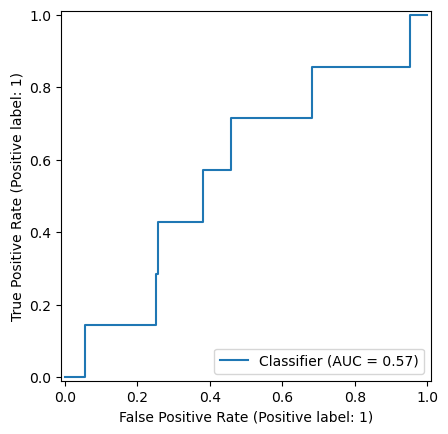

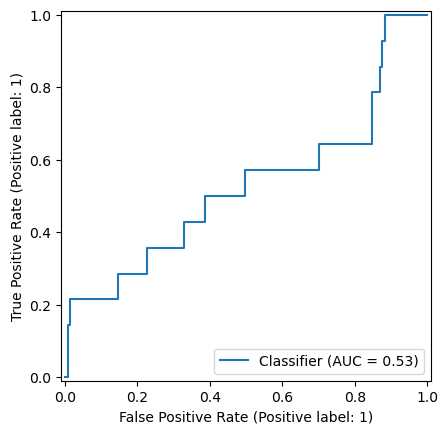

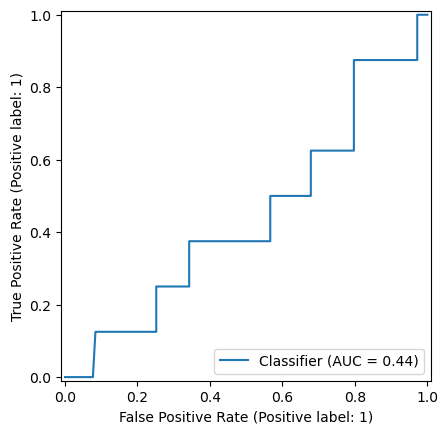

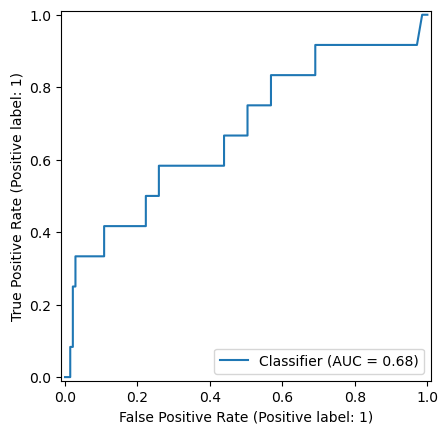

In [531]:
param_grid = {
    'n_estimators': [100, 300],          # Número de árvores
    'max_depth': [10, 20],         # Profundidade máxima
    'min_samples_split': [2, 5, 10],    # Divisão mínima válida
    'min_samples_leaf': [1, 2, 4],      # Tamanho mínimo da folha
}
metrics, best_models_list = Grid_search(random_forest, param_grid, X_train, y_train, X_test, y_test)
metrics.head()


In [512]:
from sklearn.metrics import accuracy_score

# Listas para armazenar resultados
train_accuracies = []
val_accuracies = []
epochs = list(range(1, 11))  # Simular 10 "épocas"

# Treinamento simulado por "épocas"
for epoch in epochs:
    # Treinar o modelo com uma fração crescente dos dados de treino
    fraction = epoch / max(epochs)  # Fração de dados usada
    X_train_partial = X_train_minmax[:int(len(X_train_minmax) * fraction)]
    y_train_partial = y_train[:int(len(y_train) * fraction)]
    
    # Treinar o modelo
    random_forest.fit(X_train_partial, y_train_partial)

    # Avaliar no conjunto de treino e teste
    train_pred = random_forest.predict(X_train_minmax)
    val_pred = random_forest.predict(X_test_minmax)
    
    train_accuracies.append(accuracy_score(y_train, train_pred))
    val_accuracies.append(accuracy_score(y_test, val_pred))

# Plotar os resultados
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracies, label='Treino', marker='o')
plt.plot(epochs, val_accuracies, label='Teste', marker='o', linestyle='--')

# Adicionar títulos e legendas
plt.title('Evolução da Accuracy no Random Forest', fontsize=14)
plt.xlabel('Épocas (Simuladas)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.5, 1.0)  # Ajustar limites do eixo y, se necessário
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

TypeError: 'list' object is not callable

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:06<00:00, 16.69s/it]


,Train Accuracy,Test Accuracy,CV F1 mean,CV F1 std,Precision,Recall,Specificity,F1 Score,Area under ROC curve,Best Parameters
Target,,,,,,,,,,
Hinselmann,0.960133,0.900662,0.032468,0.065517,0.000000,0.000000,0.944444,0.000000,0.586310,"{'max_depth': None, 'max_features': 'log2', 'm..."
Schiller,0.857143,0.807947,0.161020,0.064113,0.173913,0.285714,0.861314,0.216216,0.684567,"{'max_depth': None, 'max_features': 'log2', 'm..."
Citology,0.906977,0.867550,0.131349,0.149898,0.000000,0.000000,0.916084,0.000000,0.455857,"{'max_depth': None, 'max_features': 'log2', 'm..."
Biopsy,0.978405,0.920530,0.137143,0.171809,0.500000,0.166667,0.985612,0.250000,0.654077,"{'max_depth': None, 'max_features': 'log2', 'm..."


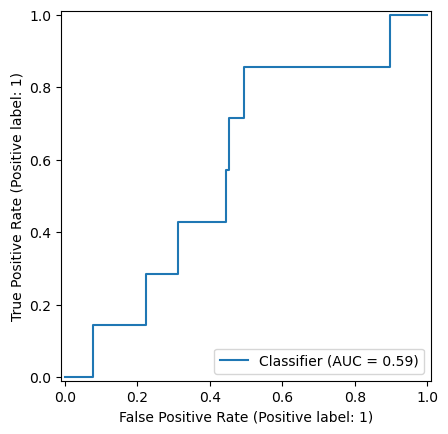

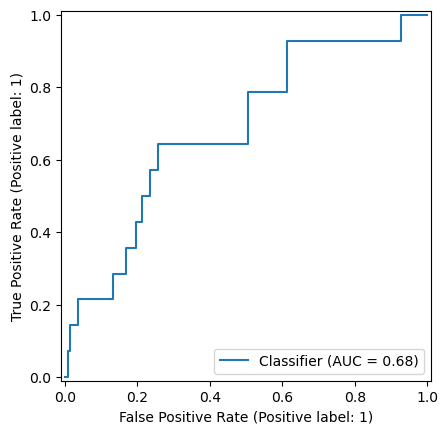

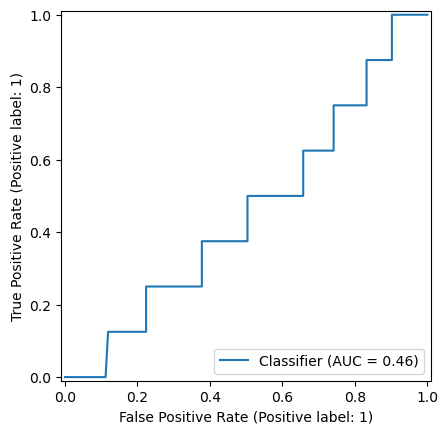

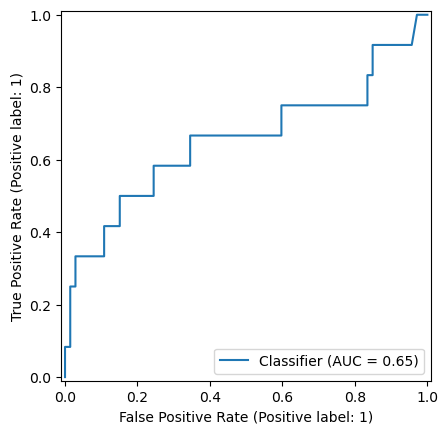

In [534]:
# Definir o grid de parâmetros com valores válidos
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

metrics, best_models_list = Grid_search(random_forest, param_grid, X_train, y_train, X_test, y_test)
metrics.head()

100%|██████████| 4/4 [06:33<00:00, 98.30s/it]


,Train Accuracy,Test Accuracy,CV F1 mean,CV F1 std,Precision,Recall,Specificity,F1 Score,Area under ROC curve,Best Parameters
Target,,,,,,,,,,
Hinselmann,0.928839,0.910448,0.203016,0.209048,0.000000,0.000000,0.960630,0.000000,0.341957,"{'max_depth': 6, 'max_features': 'sqrt', 'min_..."
Schiller,0.810861,0.761194,0.242768,0.131321,0.086957,0.153846,0.826446,0.111111,0.438017,"{'max_depth': 2, 'max_features': None, 'min_sa..."
Citology,0.921348,0.888060,0.062626,0.096230,0.166667,0.090909,0.959350,0.117647,0.586105,"{'max_depth': 4, 'max_features': 'log2', 'min_..."
Biopsy,0.889513,0.873134,0.174764,0.177066,0.285714,0.363636,0.918699,0.320000,0.621582,"{'max_depth': 2, 'max_features': 'sqrt', 'min_..."


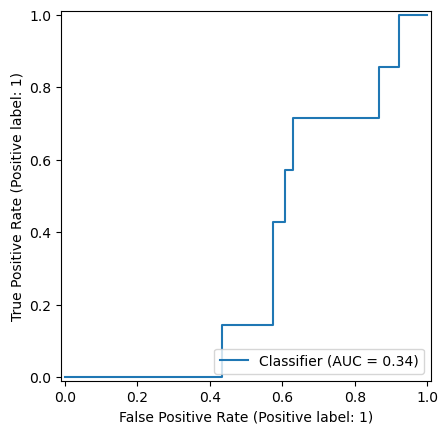

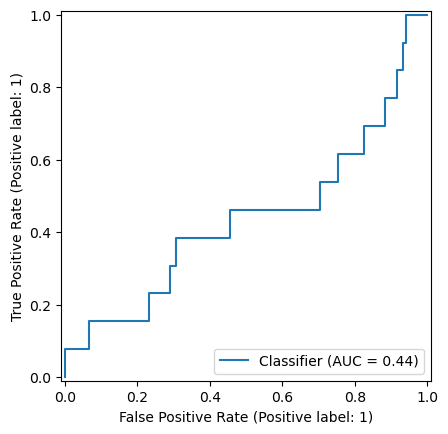

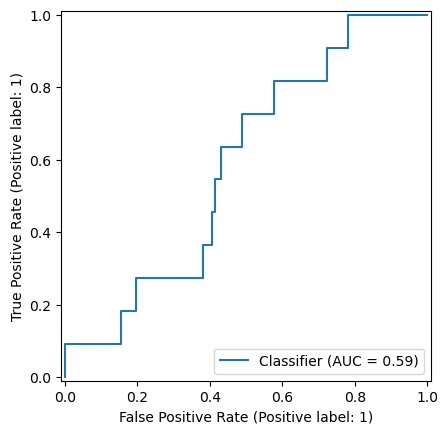

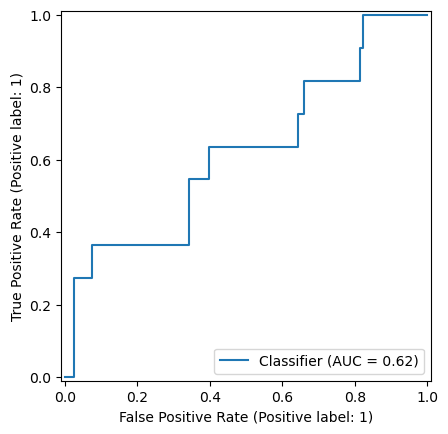

In [92]:
# Definir o grid de parâmetros com valores válidos
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

metrics, best_models_list = Grid_search(random_forest, param_grid, X_train, y_train, X_test, y_test)
metrics.head()

Como a AUC tem valores entre 0,5 e 1 podemos observar que os resultados obtidos não se encontram dentro do desejado. Precisamos de otimizar os hiperparametros de modo a obter um modelo melhor. 

In [535]:
# Definir o grid de parâmetros com valores válidos
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}
#metrics = Grid_search( random_forest, param_grid, X_train, y_train, X_test, y_test)
#metrics.head()

#aqui é oq ta mt tempo a correr


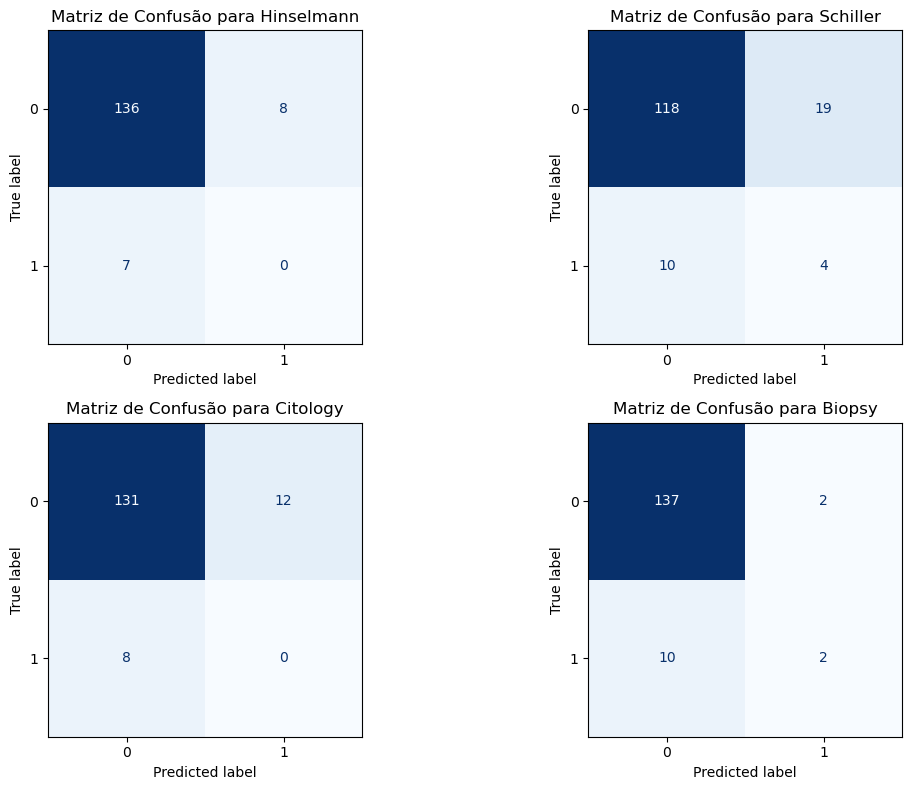

In [536]:
Confusion_matrix(best_models_list, X_test, y_test)

Como o objetivo principal é detetar corretamente verdadeiros positivos, podemos observar que o modelo não o está a fazer corretamente. 

<h4>3.2 - Support Vector machine</h4>

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]C:\Users\larad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  7.53it/s]C:\Users\larad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 50%|██████████████████████████████████████████                                          | 2/4 [00:00<00:00,  6.88it/s]C:\Users\larad\anac

,Train Accuracy,Test Accuracy,CV F1 mean,CV F1 std,Precision,Recall,Specificity,F1 Score,Area under ROC curve
Target,,,,,,,,,
Hinselmann,0.953488,0.953642,0.0,0.0,0.0,0.0,1.0,0.0,0.396825
Schiller,0.901993,0.907285,0.0,0.0,0.0,0.0,1.0,0.0,0.452033
Citology,0.945183,0.947020,0.0,0.0,0.0,0.0,1.0,0.0,0.437500
Biopsy,0.931894,0.920530,0.0,0.0,0.0,0.0,1.0,0.0,0.403477


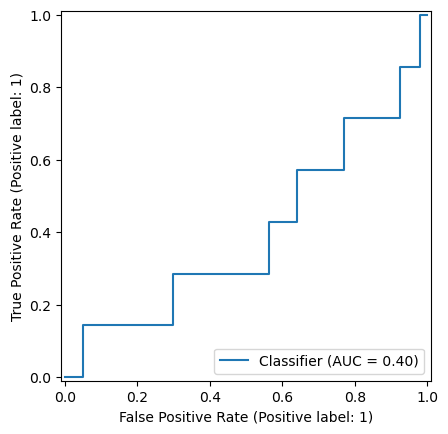

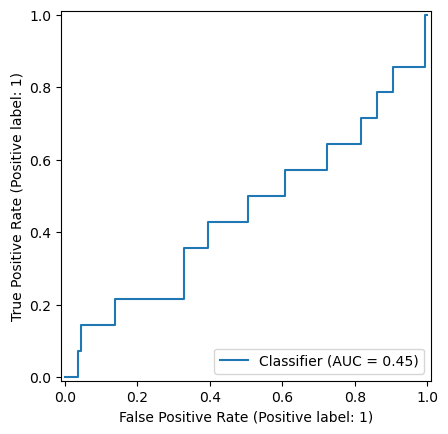

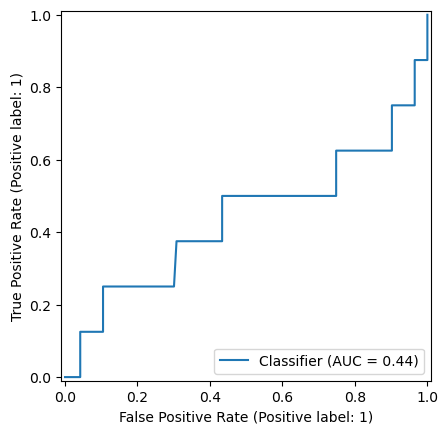

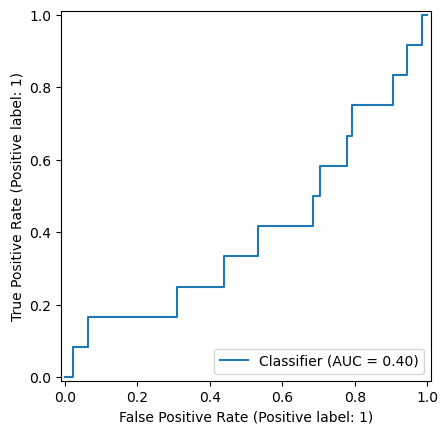

In [537]:
from sklearn.svm import LinearSVC, SVC
from tabulate import tabulate

model = ('SVC', SVC())

# Dividir os dados
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Treinar e avaliar
model_metrics = train_and_evaluate_multi_target(model, X_train, Y_train, X_test, Y_test)

# Mostrar o DataFrame com formatação tabular
model_metrics.head()


<h4>3.3 Logistic Regression Nada funciona</h4>

100%|██████████| 4/4 [00:00<00:00, 15.92it/s]


,Train Accuracy,Test Accuracy,CV F1 mean,CV F1 std,Precision,Recall,Specificity,F1 Score,Area under ROC curve
Target,,,,,,,,,
Hinselmann,0.747323,0.721393,0.136598,0.062329,0.040000,0.200000,0.748691,0.066667,0.448168
Schiller,0.770878,0.751244,0.226307,0.115425,0.155556,0.368421,0.791209,0.218750,0.514748
Citology,0.713062,0.701493,0.102409,0.063263,0.086207,0.416667,0.719577,0.142857,0.605379
Biopsy,0.824411,0.756219,0.210978,0.112975,0.113636,0.333333,0.790323,0.169492,0.580645


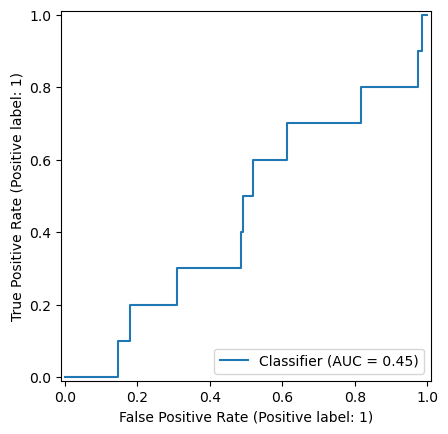

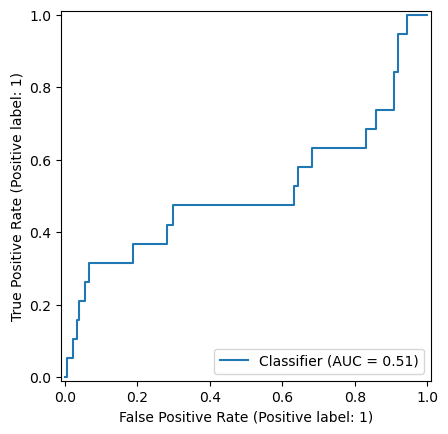

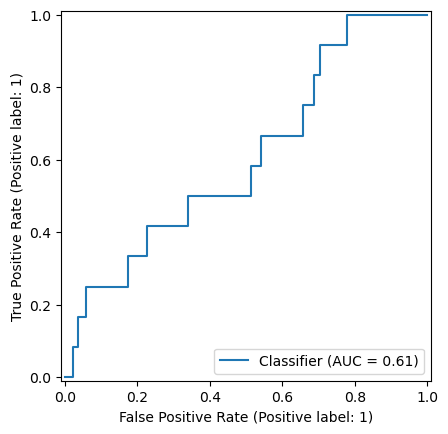

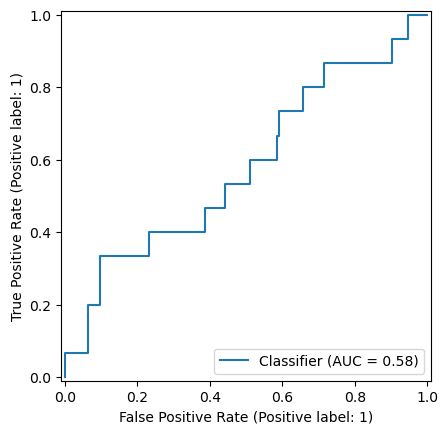

In [1032]:
#### UMA MERDA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

logistic_regression =('Logistic Regression', LogisticRegression(class_weight='balanced'))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (do not fit again)
X_test_scaled = scaler.transform(X_test)
# Treinar e avaliar

model_metrics = train_and_evaluate_multi_target(logistic_regression, X_train_scaled, y_train, X_test_scaled, y_test)

# Mostrar o DataFrame com formatação tabular
model_metrics.head()



100%|██████████| 4/4 [00:00<00:00, 16.79it/s]


,Train Accuracy,Test Accuracy,CV F1 mean,CV F1 std,Precision,Recall,Specificity,F1 Score,Area under ROC curve
Target,,,,,,,,,
Hinselmann,0.745182,0.716418,0.149359,0.073131,0.039216,0.200000,0.743455,0.065574,0.498429
Schiller,0.732334,0.736318,0.247167,0.119514,0.185185,0.526316,0.758242,0.273973,0.603528
Citology,0.680942,0.706468,0.116230,0.073711,0.072727,0.333333,0.730159,0.119403,0.555115
Biopsy,0.815846,0.741294,0.248513,0.143534,0.122449,0.400000,0.768817,0.187500,0.605018


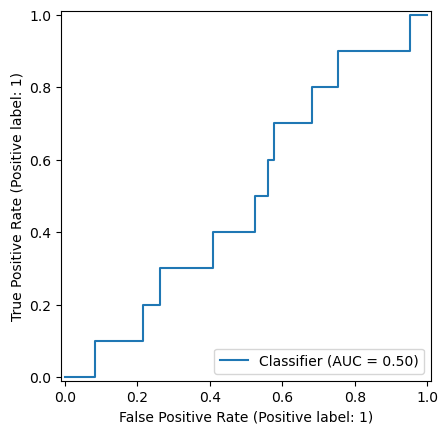

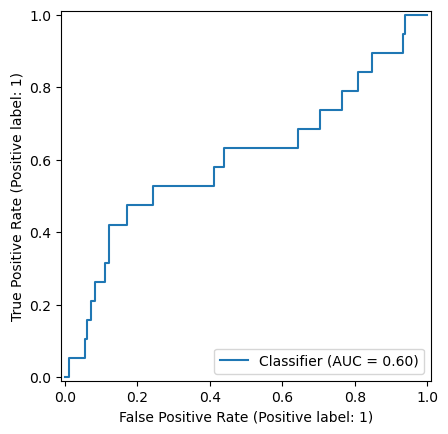

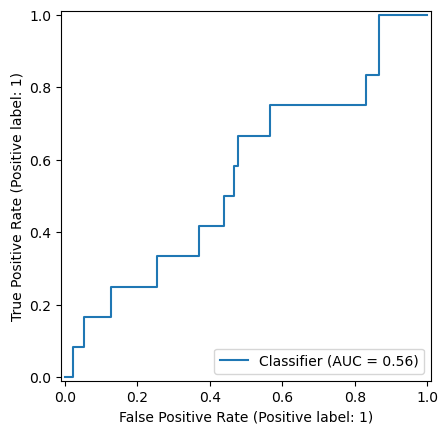

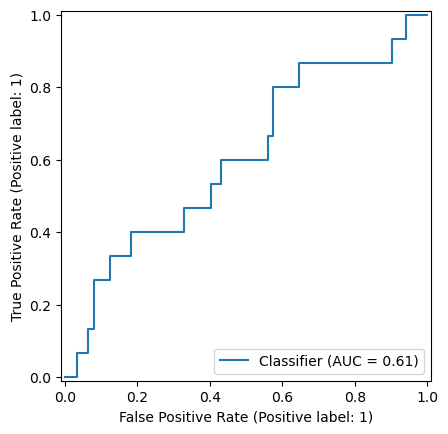

In [1047]:
#UM CARALHO
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

logistic_regression =('Logistic Regression', LogisticRegression(class_weight='balanced', max_iter = 30000))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (do not fit again)
X_test_scaled = scaler.transform(X_test)
# Treinar e avaliar

from sklearn.decomposition import PCA
pca = PCA(n_components=16)  # You can experiment with the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model_metrics = train_and_evaluate_multi_target(logistic_regression, X_train_pca, y_train, X_test_pca, y_test)

# Mostrar o DataFrame com formatação tabular
model_metrics.head()

100%|██████████| 4/4 [00:10<00:00,  2.60s/it]


,Train Accuracy,Test Accuracy,CV F1 mean,CV F1 std,Precision,Recall,Specificity,F1 Score,Area under ROC curve
Target,,,,,,,,,
Hinselmann,0.920771,0.880597,0.090000,0.111355,0.111111,0.200000,0.916230,0.142857,0.475916
Schiller,0.935760,0.805970,0.182222,0.166533,0.205882,0.368421,0.851648,0.264151,0.595720
Citology,0.905782,0.796020,0.029167,0.059073,0.085714,0.250000,0.830688,0.127660,0.508377
Biopsy,0.957173,0.855721,0.139189,0.120792,0.150000,0.200000,0.908602,0.171429,0.603226


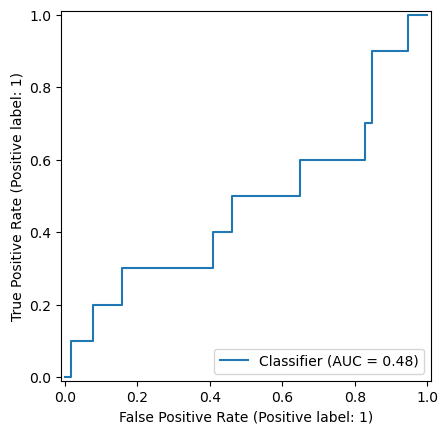

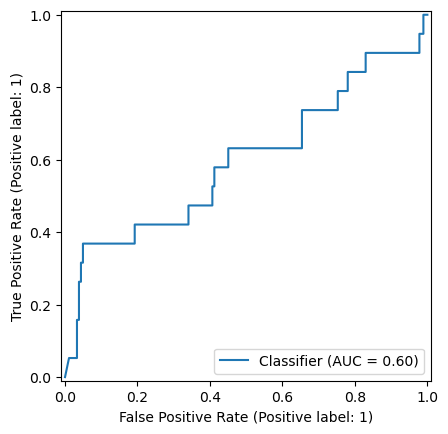

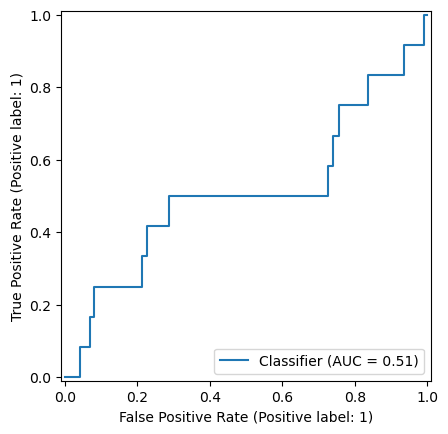

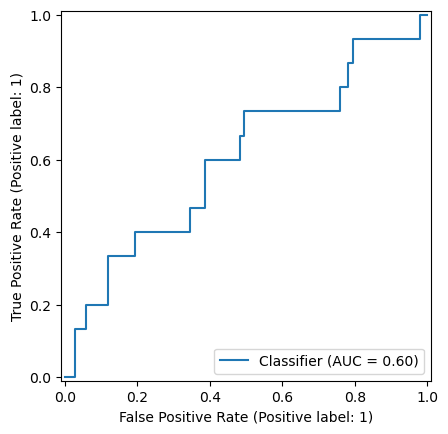

In [1055]:
#GRANDE MERDA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

logistic_regression =('Logistic Regression', LogisticRegression(class_weight='balanced',max_iter = 30000))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler 
X_test_scaled = scaler.transform(X_test)
# Treinar e avaliar

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model_metrics = train_and_evaluate_multi_target(logistic_regression, X_train_poly, y_train, X_test_poly, y_test)

# Mostrar o DataFrame com formatação tabular
model_metrics.head()

In [932]:
#AQUI NADA FUNCIONAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

metrics_list = []

# Assuming logistic_regression is a tuple containing model_name and model_instance
model_name, model_instance = logistic_regression

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'penalty': ['l2', 'elasticnet'], 
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'saga'],  # 'saga' supports all penalties
    'max_iter': [500, 1000, 10000],
    'class_weight': ['balanced', None],
    'tol': [1e-4, 1e-5]
}
# Create RandomizedSearchCV object for logistic regression
optimized_logistic_regress = RandomizedSearchCV(estimator=model_instance, param_distributions=param_grid, cv=10, 
                                                scoring='f1', verbose=2, n_iter=100, random_state=42, n_jobs=-1)

# Loop through each target variable in y_train (assuming it's multi-output)
for i in tqdm(range(y_train.shape[1])):
    y_train_i = y_train.iloc[:, i]  # Select the i-th column from y_train
    y_test_i = y_test.iloc[:, i]    # Select the i-th column from y_test
    target_name = y_train.columns[i]

    # Perform RandomizedSearchCV fitting
    optimized_logistic_regress.fit(X_train_scaled, y_train_i)  # Fit model using target y_train_i
    
    # Get the best model and make predictions
    best_model = optimized_logistic_regress.best_estimator_
#NÃO TÁ ACABADO

  0%|          | 0/4 [00:00<?, ?it/s]

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\larad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
520 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
220 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\larad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\larad\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\larad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\larad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
520 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
220 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\larad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\larad\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\larad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\larad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
520 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
220 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\larad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\larad\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\larad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\larad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
520 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
220 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\larad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\larad\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\larad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver

<h4>3.4 Ensemble Model </h4>

<h4>3.5 Linear Regression - Diagnosis </h4>

In [784]:
#Preparar os Dados
Y = df_cervical_cancer['Dx']  # Target variable
X = df_cervical_cancer.drop(['Dx'], axis=1)  # Features

from sklearn.linear_model import LinearRegression
model = ('Linear Regression', LinearRegression())

# Dividir os dados
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#isto vai ser treinado de maneiras mt diferentes e tem que se criar outras funções não podemos usar as lá de cima pq n é classificador

 <h3>4. Result evaluation</h3>

 <h3>5. Discussion</h3>

 <h3>6. Model test (onde fazemos o questionário para mostrar a aplicação do nosso modelo</h3>